In [2]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

# Snapshot of Debye layer potential

In [7]:
file = "output-00600.h5"

In [8]:
f = h5py.File('output/hdf5/{file}'.format(file=file),'r')

In [9]:
for i in f.keys():
    print(i)

DOMAIN
ELEC
MEMBRANE
time


In [11]:
for i in f['DOMAIN'].keys():
    print(i)

cd
cl
cl_grad_0
cl_grad_1
k
k_grad_0
k_grad_1
na
na_grad_0
na_grad_1
pot
pot_grad_0
pot_grad_1
x
y


In [12]:
x = f['DOMAIN']['x']
y = f['DOMAIN']['y']
pot = f['DOMAIN']['pot']

In [13]:
# Use slice in x-direction
xrange = range(10,12)
# Use part of y-range immediately above the membrane (index 32)
yrange = range(32,45)

In [16]:
# Attention: x- and y-dimensions in HDF5 files are swapped! 
# y-indices come at before x-indices, contrary to common convention
X = x[yrange,:][:,xrange]
Y = y[yrange,:][:,xrange]
Z = pot[yrange,:][:,xrange]

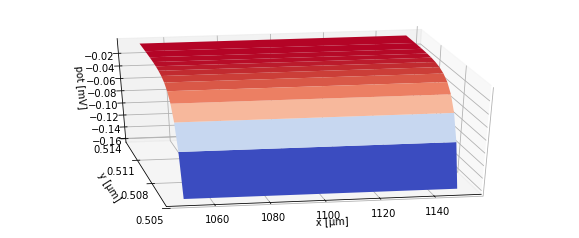

In [17]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X/1e3, Y/1e3, Z, cmap=cm.coolwarm)
ax.set_xlabel("x [µm]")
ax.set_ylabel("y [µm]")
ax.set_yticks(np.arange(0.505,0.515,0.003))
ax.set_zlabel("pot [mV]")
ax.azim = -100